DataSet Link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,\
roc_curve,recall_score,classification_report ,f1_score,precision_score
from sklearn.svm import SVC


plt.style.use('fivethirtyeight')
import itertools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#from sklearn import datasets

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

~ *Mean_Features=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']*    --- 10 features
       
~ *SE_Features=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']*  --- 10 features
       
~ *Wrost_features=['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']*  --- 10 features

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Data Exploration & Prepration

#### Missing Data

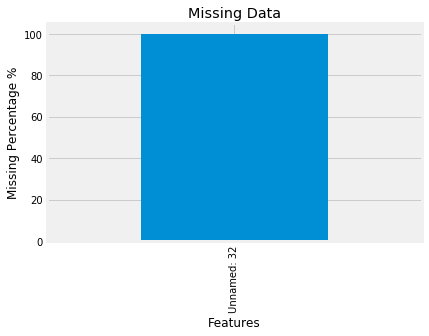

In [6]:
missing_cols=(df.isnull().sum()/df.shape[0])*100
missing_cols= missing_cols[missing_cols>0]
missing_cols.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage %')
plt.title('Missing Data')
plt.show()

Some random column " Unamed : 32 " got added , dropping as everything is NaN

In [7]:
df.shape

(569, 33)

In [8]:
df.id.unique().shape[0]

569

Observation :

- Id Column has all unique values , no pattern
- Unamed : 32 column has all NaN 
- Dropping these columns

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
cols_to_drop=['id','Unnamed: 32']
df.drop(cols_to_drop,axis=1,inplace=True)
df.shape

(569, 31)

#### Target Feature

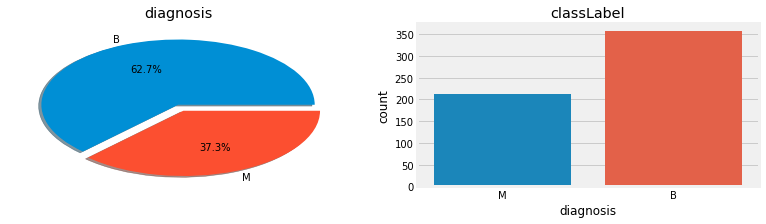

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=df,ax=ax[1])
ax[1].set_title('classLabel')
plt.show()

Observation:
    - balanced dataset
    - Class distribution: 357 benign, 212 malignant

#### Variable Identification
- Variable DataType : Numerical or Categorical

In [12]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

#### LabelEncoding target variable

In [13]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- All features are in different scale , we need to make them comparable

### Univariate Analysis
- Histograms
- Boxplots

highlight missing and outlier values

#### Starting with mean  features

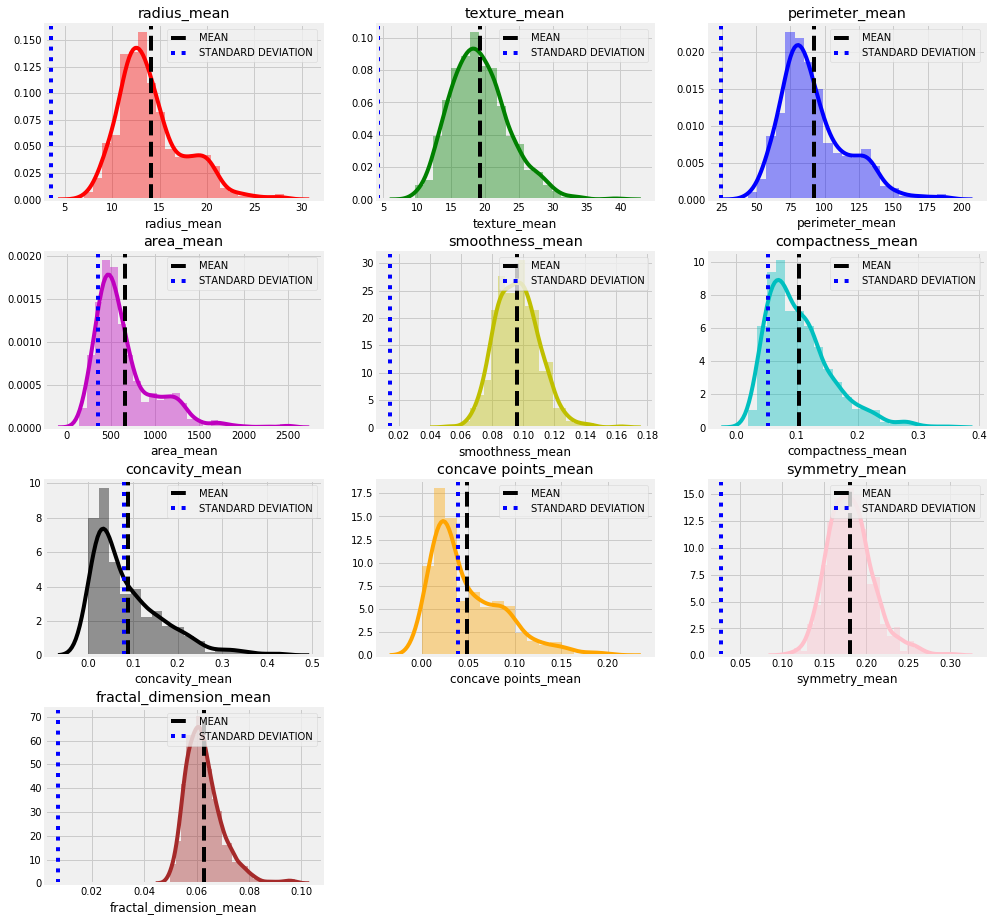

In [15]:
columns = df.iloc[:,1:11].columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'pink','brown'] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    #plt.subplot(length/3,length/2,j+1)
    plt.subplot(5,3,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df.iloc[:,1:11][i],color=k)
    #sns.boxplot(df_num[i+1],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df.iloc[:,1:11][i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df.iloc[:,1:11][i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

#### Boxplots Mean Features

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


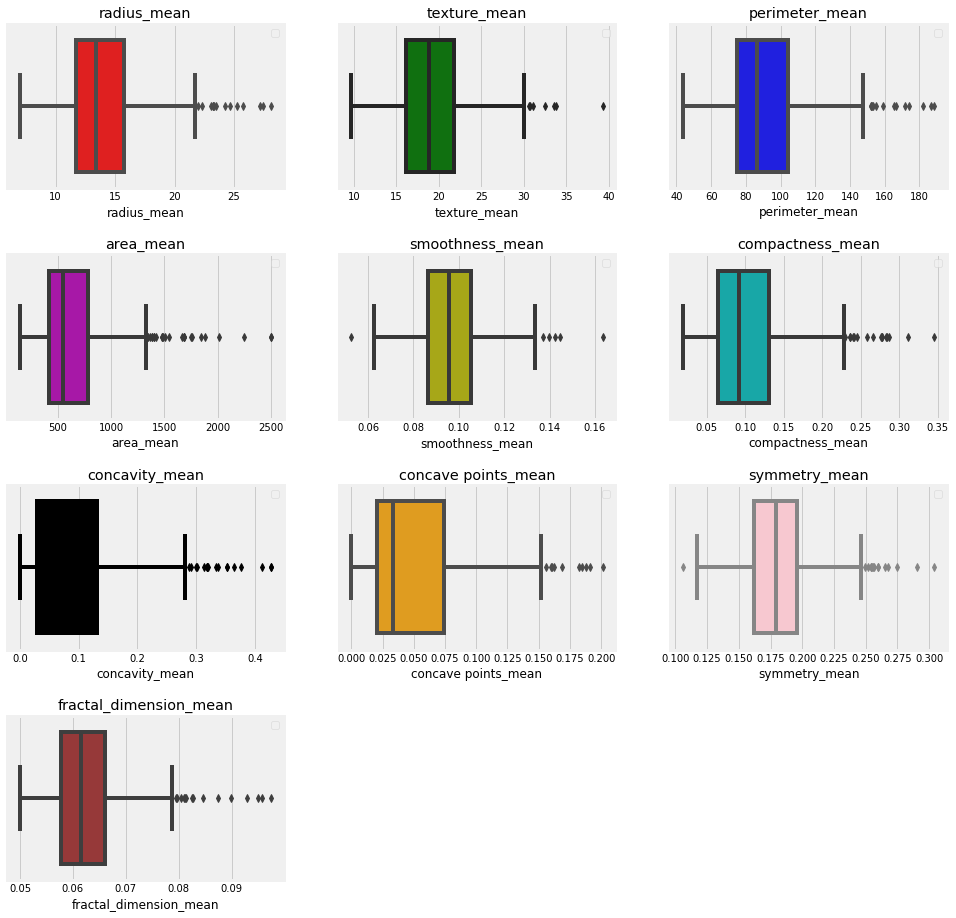

In [16]:
columns = df.iloc[:,1:11].columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'pink','brown'] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/3,j+1)
    sns.boxplot(df.iloc[:,1:11][i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

#### Looking at distribution of SE variables

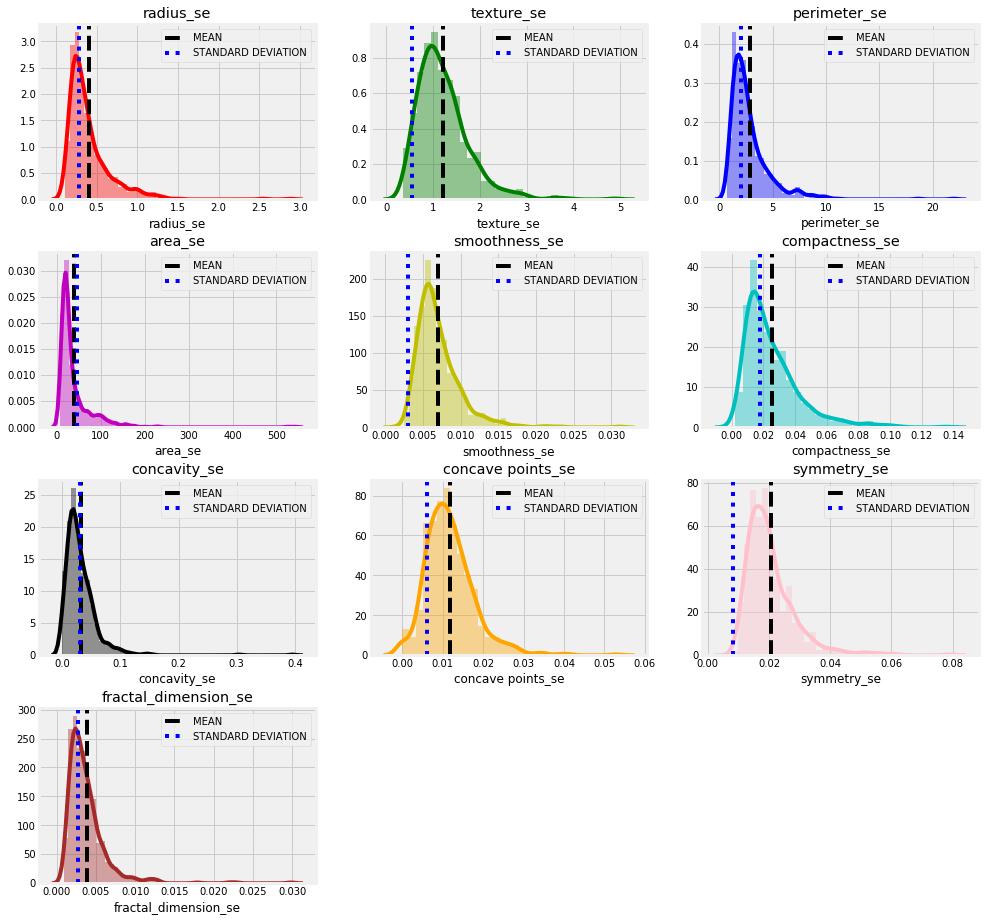

In [17]:
columns = df.iloc[:,11:21].columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'pink','brown'] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    #plt.subplot(length/3,length/2,j+1)
    plt.subplot(5,3,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df.iloc[:,11:21][i],color=k)
    #sns.boxplot(df_num[i+1],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df.iloc[:,11:21][i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df.iloc[:,11:21][i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

#### Boxplot SE Features

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


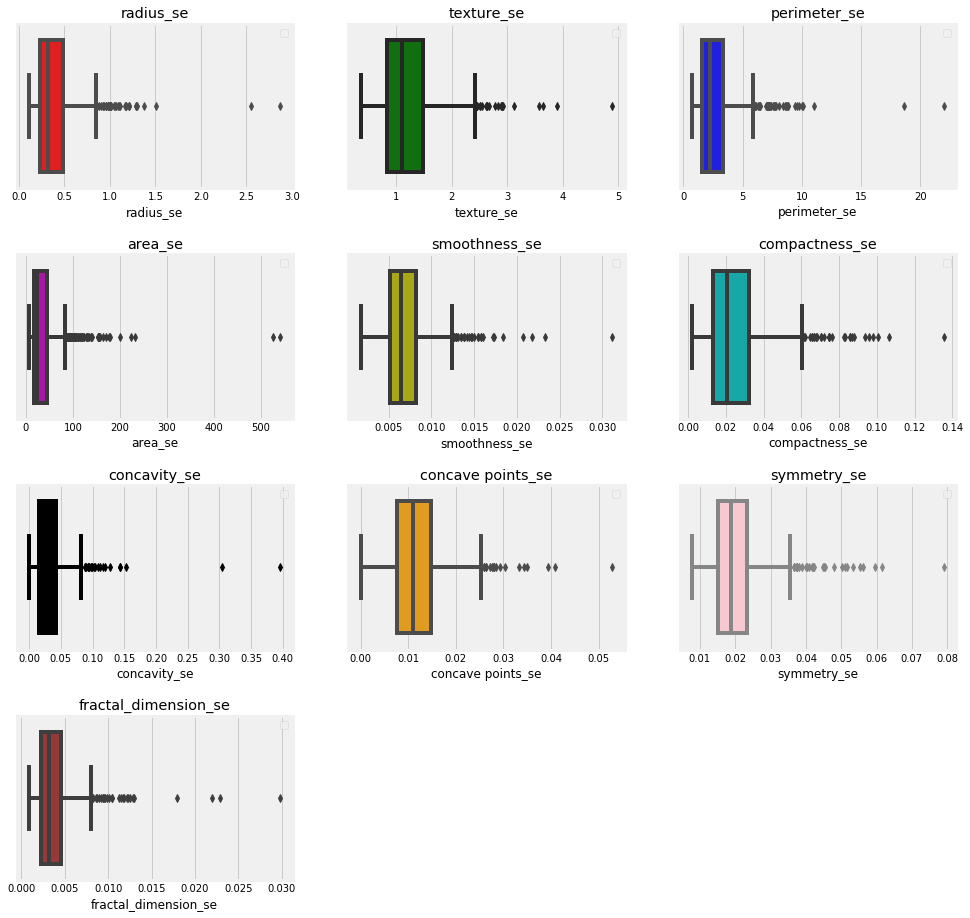

In [18]:
columns = df.iloc[:,11:21].columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'pink','brown'] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/3,j+1)
    sns.boxplot(df.iloc[:,11:21][i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

#### Largest Value features

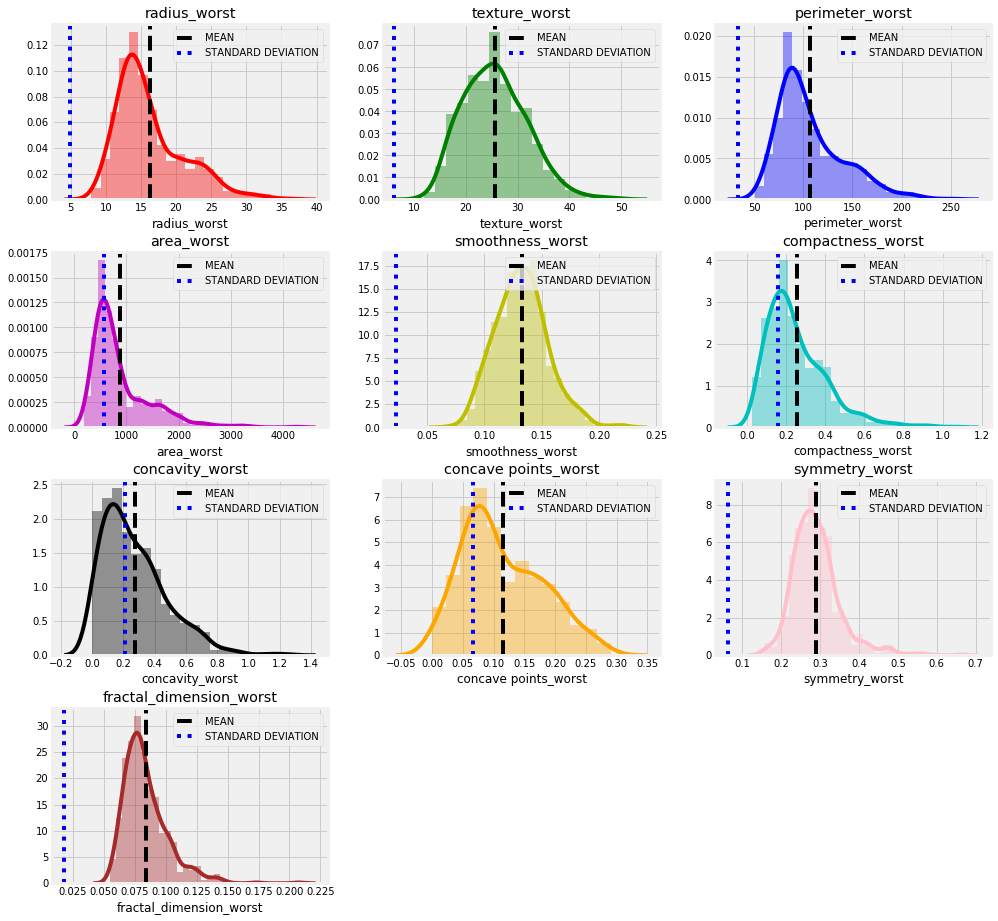

In [19]:
columns = df.iloc[:,21:].columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'pink','brown'] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    #plt.subplot(length/3,length/2,j+1)
    plt.subplot(5,3,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df.iloc[:,21:][i],color=k)
    #sns.boxplot(df_num[i+1],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df.iloc[:,21:][i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df.iloc[:,21:][i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

### Boxplot Wrost Features

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


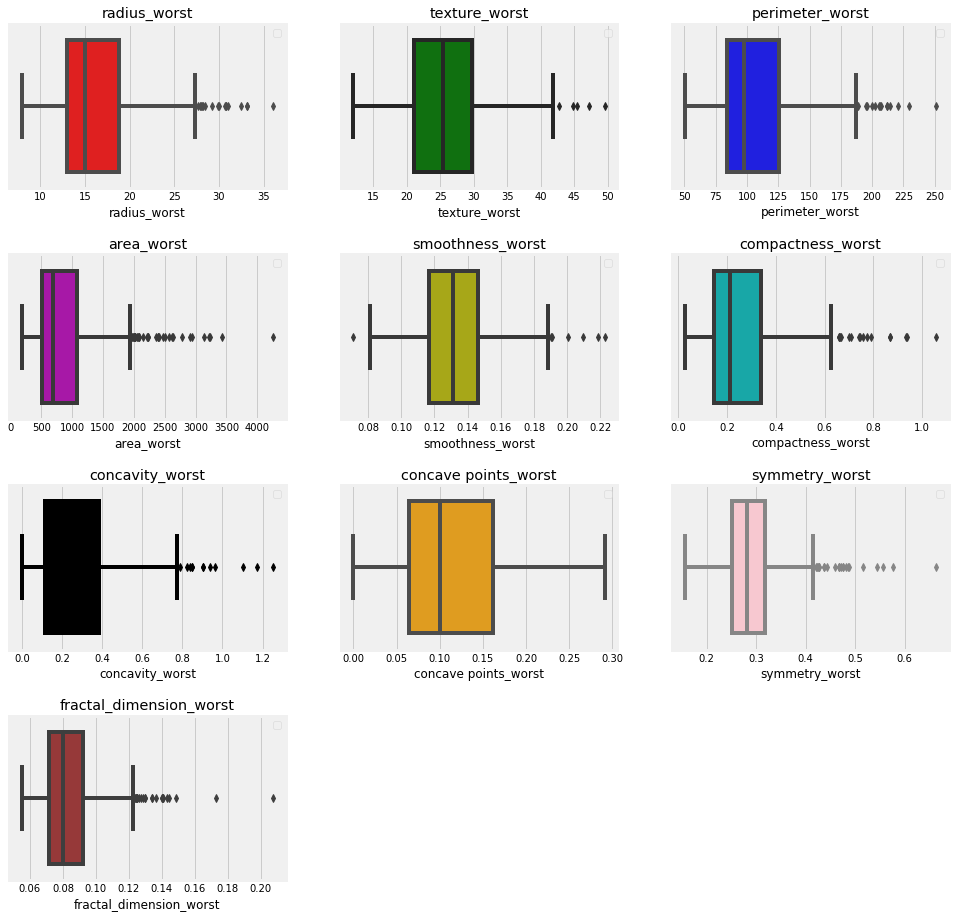

In [20]:
columns = df.iloc[:,21:].columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'pink','brown'] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/3,j+1)
    sns.boxplot(df.iloc[:,21:][i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

Inference :
    - All features are normally distributed.
    - No significant outliers.

#### Mean Values distribution w.r.t Target Varaible

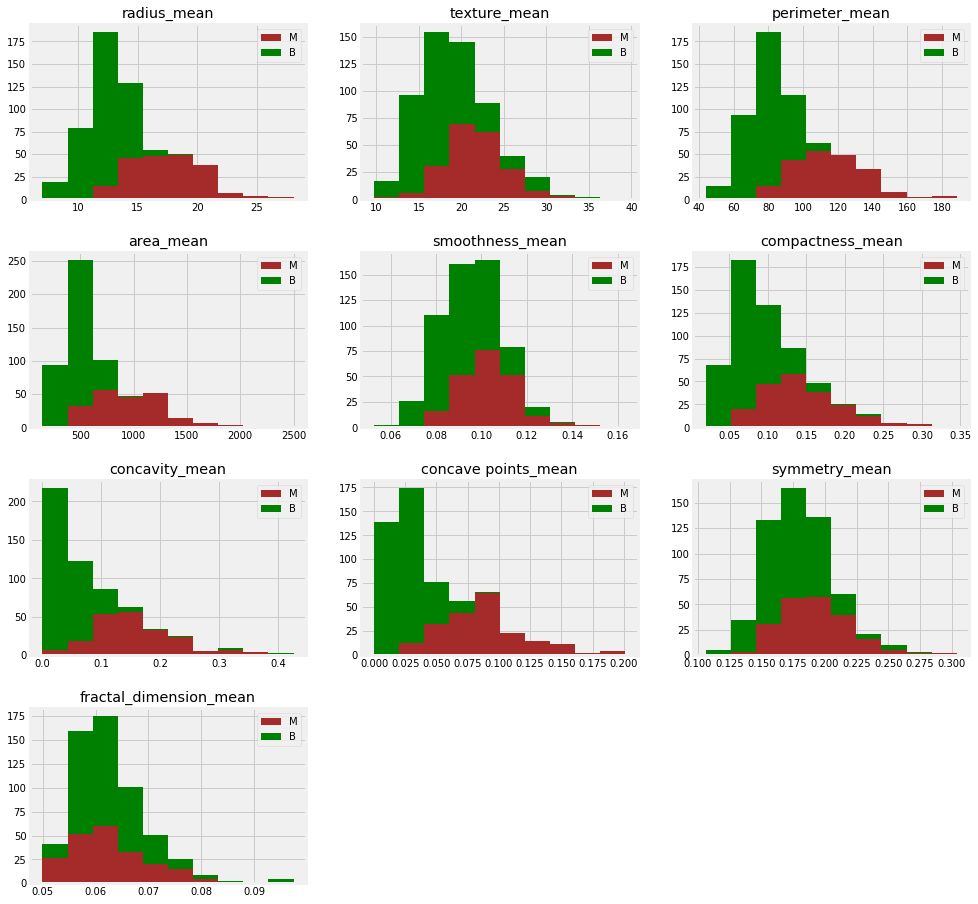

In [21]:
columns = df.iloc[:,1:11].columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/3,j+1)
    plt.hist(x = [df[df['diagnosis']==1][i], df[df['diagnosis']==0][i]], 
         stacked=True, color = ['brown','green'],label = ['M','B'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

Observations
- mean values of radius, perimeter, area, compactness and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- Other does not show a particular preference of one diagnosis over the other. Overlapping Distributions.

#### SE features w.r.t target variable

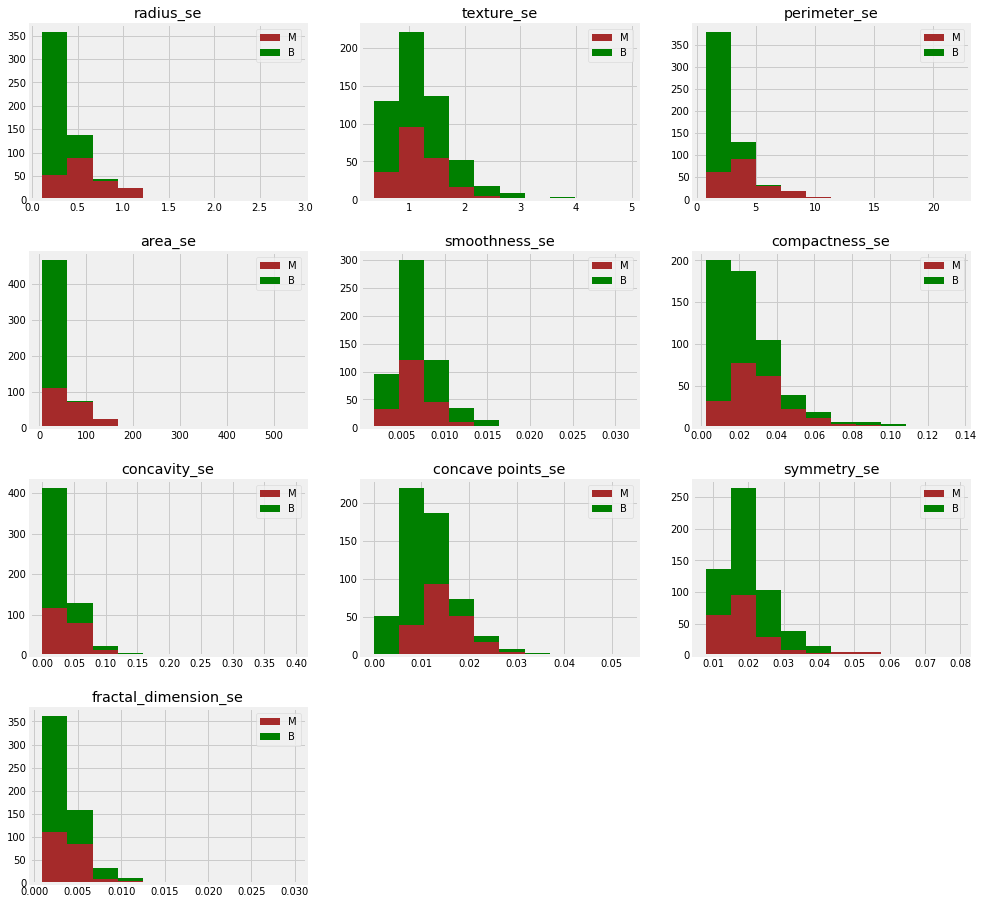

In [22]:
columns = df.iloc[:,11:21].columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/3,j+1)
    plt.hist(x = [df[df['diagnosis']==1][i], df[df['diagnosis']==0][i]], 
         stacked=True, color = ['brown','green'],label = ['M','B'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

Obsertvations :
    
- se values of Concave points can also be used in classification of the cancer.Smaller values of these parameters tends to show a correlation with benign tumors.
- Other does not show a particular preference of one diagnosis over the other. Overlapping Distributions.

#### Wrost type features w.r.t target variable 

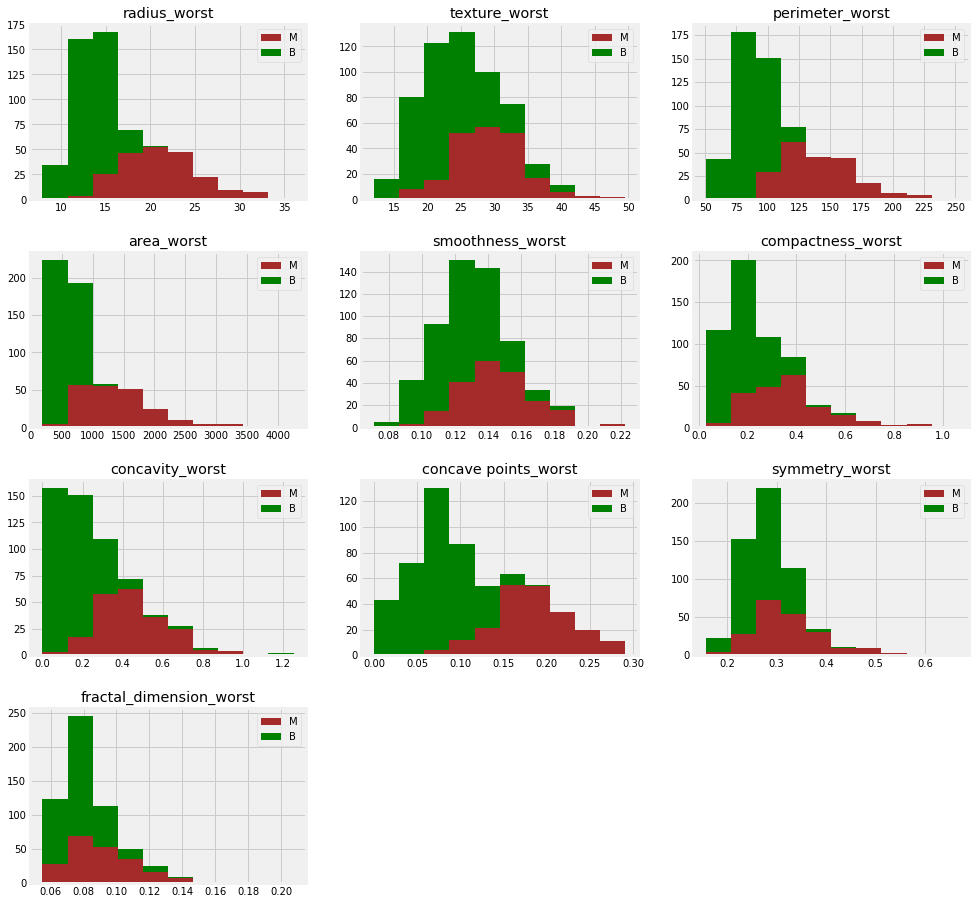

In [23]:
columns = df.iloc[:,21:].columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/3,j+1)
    plt.hist(x = [df[df['diagnosis']==1][i], df[df['diagnosis']==0][i]], 
         stacked=True, color = ['brown','green'],label = ['M','B'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

Observations
- wrost values of radius, perimeter, area, compactness and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- Other does not show a particular preference of one diagnosis over the other. Overlapping Distributions.

**Observation Summary**
- Mean features to be used radius, perimeter, area, compactness and concave points ( 5 features)
- SE features to be used concave points ( 1 features)
- Wrost features to be used radius, perimeter, area, compactness and concave points. (5 features)
- 11 features 

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
cols_to_use=['diagnosis', 'radius_mean',  'perimeter_mean',\
       'area_mean', 'compactness_mean', \
       'concave points_mean','concave points_se','radius_worst','perimeter_worst', 'area_worst','compactness_worst','concave points_worst']
df1=df[cols_to_use]
df1.shape

(569, 12)

In [26]:
df1.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_mean,concave points_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.14710,0.01587,25.38,184.60,2019.0,0.6656,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.07017,0.01340,24.99,158.80,1956.0,0.1866,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.12790,0.02058,23.57,152.50,1709.0,0.4245,0.2430
3,1,11.42,77.58,386.1,0.28390,0.10520,0.01867,14.91,98.87,567.7,0.8663,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.10430,0.01885,22.54,152.20,1575.0,0.2050,0.1625


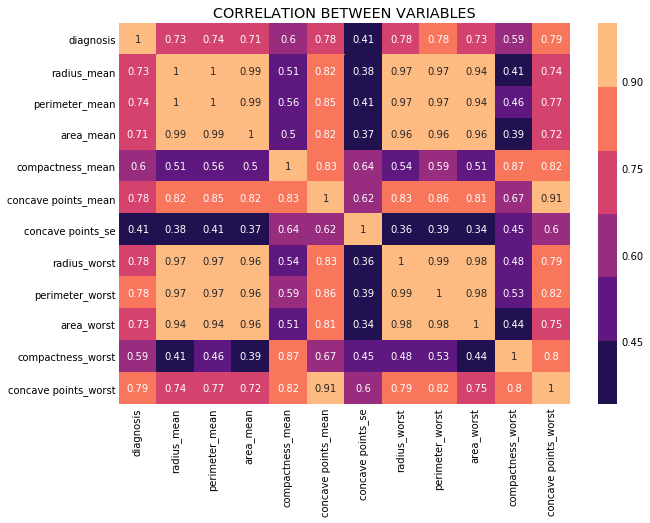

In [27]:
correlation = df1.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

Observation 
- High correlation between mean features & wrost features
- High correlation within mean features

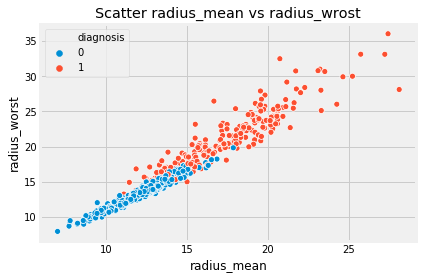

In [28]:
#plt.scatter(x=df1['radius_mean'],y=df['radius_worst'],)
sns.scatterplot(x=df1['radius_mean'], y=df1['radius_worst'], hue=df.diagnosis)
plt.title('Scatter radius_mean vs radius_wrost')
plt.show()

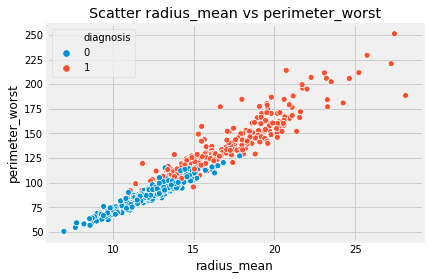

In [29]:
#plt.scatter(x=df1['radius_mean'],y=df['radius_worst'],)
sns.scatterplot(x=df1['radius_mean'], y=df1['perimeter_worst'], hue=df.diagnosis)
plt.title('Scatter radius_mean vs perimeter_worst')
plt.show()

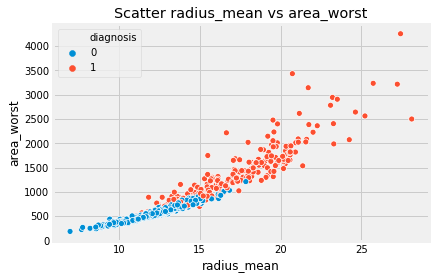

In [30]:
#plt.scatter(x=df1['radius_mean'],y=df['radius_worst'],)
sns.scatterplot(x=df1['radius_mean'], y=df1['area_worst'], hue=df.diagnosis)
plt.title('Scatter radius_mean vs area_worst')
plt.show()

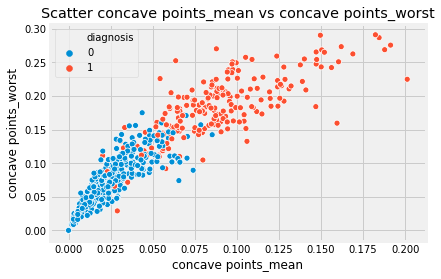

In [31]:
#plt.scatter(x=df1['radius_mean'],y=df['radius_worst'],)
sns.scatterplot(x=df1['concave points_mean'], y=df1['concave points_worst'], hue=df.diagnosis)
plt.title('Scatter concave points_mean vs concave points_worst')
plt.show()

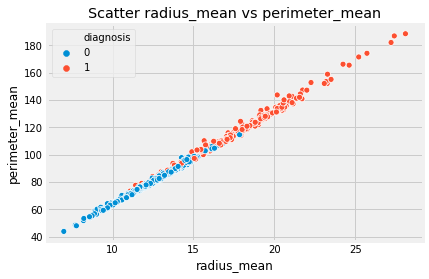

In [32]:
#plt.scatter(x=df1['radius_mean'],y=df['radius_worst'],)
sns.scatterplot(x=df1['radius_mean'], y=df1['perimeter_mean'], hue=df.diagnosis)
plt.title('Scatter radius_mean vs perimeter_mean')
plt.show()

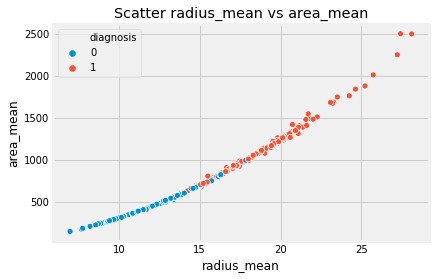

In [33]:
#plt.scatter(x=df1['radius_mean'],y=df['radius_worst'],)
sns.scatterplot(x=df1['radius_mean'], y=df1['area_mean'], hue=df.diagnosis)
plt.title('Scatter radius_mean vs area_mean')
plt.show()

**Dropping  correlated features**
- Dropping radius_worst,perimeter_worst,area_worst,compactness_worst,concave points_worst

In [34]:
cols_to_use=['diagnosis', 'radius_mean',  \
       'compactness_mean', \
       'concave points_se']
df2=df[cols_to_use]
df2.shape

(569, 4)

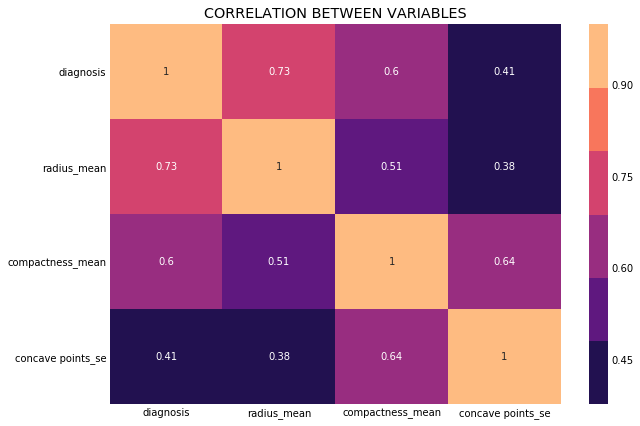

In [35]:
correlation = df2.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

### Modelling

In [36]:
y=df2.diagnosis
X=df[['radius_mean','compactness_mean','concave points_se']]
X.shape,y.shape

((569, 3), (569,))

#### Standard Scaler
Why do you need to standardize your data ? For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

In [37]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Splitting Data into training & Testing**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Logistic Regresion

____________________________________________________________________________________________________ 

The accuracy of the Logistic Regression is 0.8888888888888888
____________________________________________________________________________________________________ 

             precision    recall  f1-score   support

          0       0.90      0.93      0.91       108
          1       0.87      0.83      0.85        63

avg / total       0.89      0.89      0.89       171

____________________________________________________________________________________________________


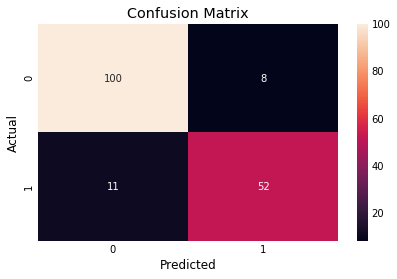

In [39]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',accuracy_score(y_test,prediction1))
print("__"*50,"\n")
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

**Linear Kernel**

____________________________________________________________________________________________________ 

The accuracy of the Linear SVM is 0.8888888888888888
____________________________________________________________________________________________________ 

             precision    recall  f1-score   support

          0       0.91      0.92      0.91       108
          1       0.85      0.84      0.85        63

avg / total       0.89      0.89      0.89       171

____________________________________________________________________________________________________


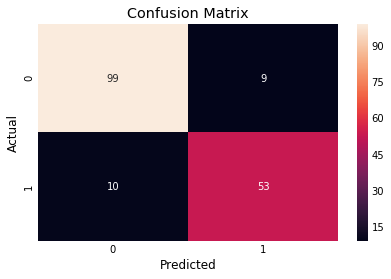

In [40]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Linear SVM is',accuracy_score(y_test,prediction1))
print("__"*50,"\n")
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Polynomial Kernel of degree 3**

____________________________________________________________________________________________________ 

The accuracy of the Polynomial SVM is 0.8713450292397661
____________________________________________________________________________________________________ 

             precision    recall  f1-score   support

          0       0.84      0.98      0.91       108
          1       0.96      0.68      0.80        63

avg / total       0.88      0.87      0.87       171

____________________________________________________________________________________________________


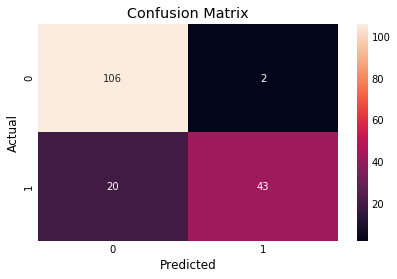

In [41]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Polynomial SVM is',accuracy_score(y_test,prediction1))
print("__"*50,"\n")
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**RBF Kernel**

____________________________________________________________________________________________________ 

The accuracy of the SVM is 0.8888888888888888
____________________________________________________________________________________________________ 

             precision    recall  f1-score   support

          0       0.90      0.93      0.91       108
          1       0.87      0.83      0.85        63

avg / total       0.89      0.89      0.89       171

____________________________________________________________________________________________________


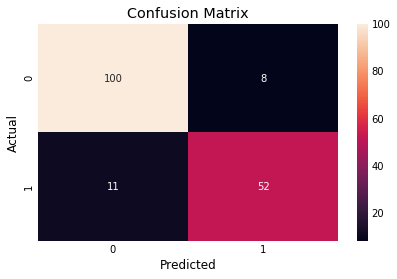

In [42]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the SVM is',accuracy_score(y_test,prediction1))
print("__"*50,"\n")
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Model Accuracy**
1. Logistic Regression : 88 %
2. Linear SVM : 88 %
3. Polynomial Kernel : 87 %
4. RBF Kernel : 88 %

#### Hyperparameter Tuning

In [43]:
%%time
params_dict=\
{'C':[0.001,0.01,0.1,1,10,100],
 'gamma':[0.001,0.01,0.1,1,10,100],
 'kernel':['linear','rbf']}
model1=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
model1.fit(X_train,y_train)

Wall time: 3.98 s


In [44]:
#Best parameters for our svc model
model1.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

____________________________________________________________________________________________________ 

The accuracy of the SVM  is 0.8947368421052632
____________________________________________________________________________________________________ 

             precision    recall  f1-score   support

          0       0.88      0.96      0.92       108
          1       0.92      0.78      0.84        63

avg / total       0.90      0.89      0.89       171

____________________________________________________________________________________________________


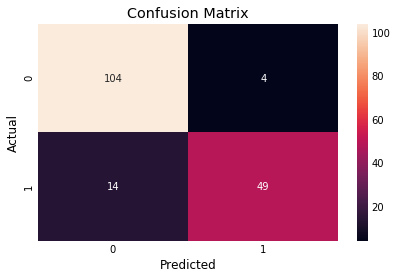

In [45]:
#Let's run our SVC again with the best parameters.
model_final = SVC(C = 0.01, gamma =  0.001, kernel= 'linear')
model_final.fit(X_train,y_train)
prediction1=model_final.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the SVM  is',accuracy_score(y_test,prediction1))
print("__"*50,"\n")
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**We improved our highest accuracy of 88% to 89% by tuning hyperparameters**

In [46]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model_final, open(filename, 'wb'))